[-0.5        -0.4999     -0.49979999 ...  1.99979999  1.9999
  2.        ]
(4, 25000)
(4, 25000)


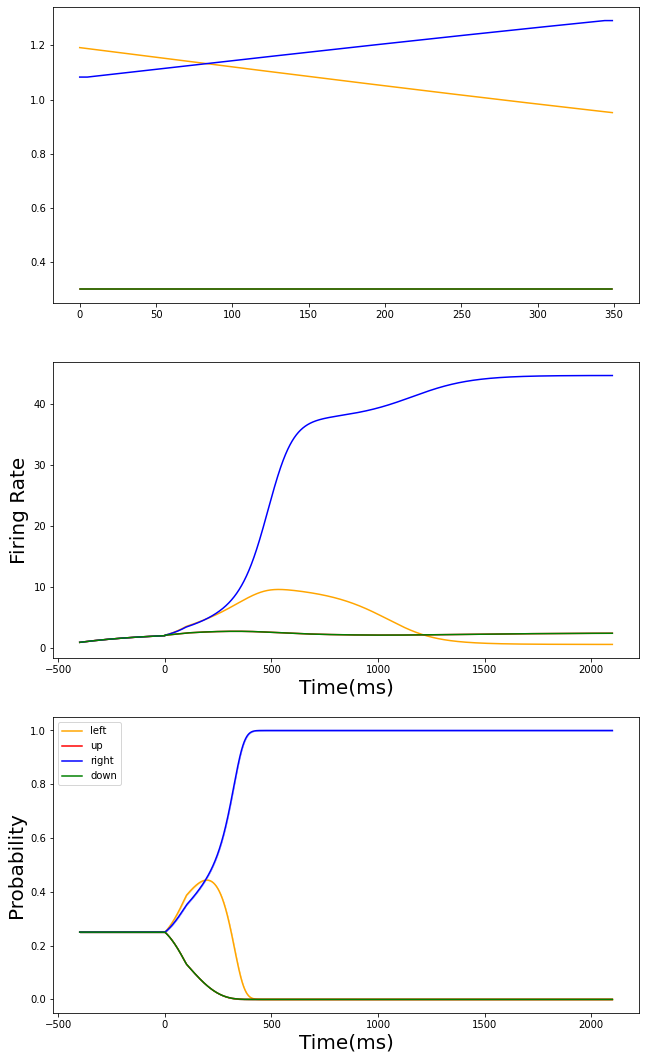

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.special import softmax


def smoothing(data):
    length = len(data)
    smoothed_data = np.zeros(length)
    width = 1000
    for i in range(length):
        if length - (i + 1) < width:
            smoothed_data[i] = np.average(data[i:])
        else:
            smoothed_data[i] = np.average(data[i:i + width])
    return smoothed_data

dt = 0.1 * 10 ** -3

starttime = -0.5
endtime = 2
steps = int(abs(starttime - endtime) / dt)
time = np.linspace(starttime, endtime, steps)


print(time)

contrast = 0.99
sum_plot=0
#3 decision with smoothing
cov=True
check=False
check_reverse=False
plt.figure

fig, axs = plt.subplots(3)
fig.set_size_inches(10.5, 18.5)
hue = ['orange', 'red', 'blue', 'green']
fig.set_size_inches(10.5, 18.5)
inputfile=np.load('input.npy')
axs[0].plot([0 + x for x in range(350)], inputfile[0], color=hue[0], label='left')
axs[0].plot([0 + x for x in range(350)], inputfile[1], color=hue[1],label='up')
axs[0].plot([0 + x for x in range(350)], inputfile[2], color=hue[2] ,label='right')
axs[0].plot([0 + x for x in range(350)], inputfile[3], color=hue[3] ,label='down')



result = np.load('resultdata_highcontrast_largesize.npy')

print(result.shape)
result1=result[:,:4000]
result2=result[:,4000:]

for idd in range(4):
             result2[idd]=smoothing(result2[idd])
result=np.concatenate((result1, result2), axis=1)

print(result.shape)

time=time+0.1


left_con = []
up_con = []
right_con = []
down_con = []



axs[1].plot(time * 1000, result[0], color=hue[0], label='left')
axs[1].plot(time * 1000, result[1], color=hue[1], label='up')
axs[1].plot(time * 1000, result[2], color=hue[2], label='right')
axs[1].plot(time * 1000, result[3], color=hue[3], label='down')



result_softmax = softmax(result, axis=0)

left_con.append(result_softmax[0])
up_con.append(result_softmax[1])
right_con.append(result_softmax[2])
down_con.append(result_softmax[3])


    #plt.xlabel('Time(ms)')
    #plt.ylabel('Firing rate(Hz)')
axs[1].set_xlabel('Time(ms)', fontsize=20)
axs[1].set_ylabel('Firing Rate', fontsize=20)
    #plt.title('Contrast-' + str(cprime) + ' Iteration-' + str(iter) + ' Firing Rate')
    # plt.text(-125, 16, 'Threshold')







left_con = np.asarray(left_con)
left_mean = left_con.mean(axis=0)
left_var = left_con.var(axis=0)

right_con = np.asarray(right_con)
right_mean = right_con.mean(axis=0)
right_var = right_con.var(axis=0)

up_con = np.asarray(up_con)
up_mean = up_con.mean(axis=0)
up_var = up_con.var(axis=0)

down_con = np.asarray(down_con)
down_mean = down_con.mean(axis=0)
down_var = down_con.var(axis=0)
axs[2].plot(time * 1000, left_mean, color=hue[0], label='left')
axs[2].plot(time * 1000, up_mean, color=hue[1], label='up')
axs[2].plot(time * 1000, right_mean, color=hue[2], label='right')
axs[2].plot(time * 1000, down_mean, color=hue[3], label='down')
axs[2].fill_between(time * 1000, left_mean - left_var, left_mean + left_var, color=hue[0], alpha=0.3)
axs[2].fill_between(time * 1000, up_mean - up_var, up_mean + up_var, color=hue[1], alpha=0.3)
axs[2].fill_between(time * 1000, right_mean - right_var, right_mean + right_var, color=hue[2], alpha=0.3)
axs[2].fill_between(time * 1000, down_mean - down_var, down_mean + down_var, color=hue[3], alpha=0.3)
axs[2].set_xlabel('Time(ms)', fontsize=20)
axs[2].set_ylabel('Probability', fontsize=20)
    # plt.plot(time * 1000, 15 * np.ones(steps))
    #.xlabel('Time(ms)')
    #plt.ylabel('Pro')
    #axs[2].set(xlabel='Time(ms)', ylabel='Time(ms)')
    #plt.title('Contrast-' + str(cprime) + ' Iteration-' + str(iter) + ' Decision Making(Smoothing)')
    # plt.text(-125, 16, 'Threshold')
    #plt.legend()
    #plt.savefig('./figs/psychophysics_' + str(cprime) + '_smoothing.png')
    #plt.show()
plt.legend()
plt.savefig('./contrasthigh_sizelarge'  + '.png')
plt.show()